The goal this week is to pratice using Markdown to write descriptive text in notebooks and then look at Python data structures including the pandas module that supports data structures designed for handling the kind of data we'll be working with.  

There is probably too much work to complete here in the workshop session, but please use this notebook after the workshop to practice your Python.  Remember to commit your changes to git as you go and push back to Github when you are done.

In [ ]:
student_name = "Your Name Here"
student_id = "Your ID Here"

## Markdown Practice

Complete this section as per the instructions in the iLearn practical page.  Add the required cells below this one.

## Lists and Dictionaries

First we look at some built in Python data structures: lists and dictionaries. 

A list is a sequence of things, unlike strongly typed languages (Java, C#) a list can contain a mixture of different types - there is no type for a list of integers or a list of lists.   Here are some lists:

In [ ]:
ages = [12, 99, 51, 3, 55]
names = ['steve', 'jim', 'mary', 'carrie', 'zin']
stuff = [12, 'eighteen', 6, ['another', 'list']]

1. write code to print the first and third elements of each list
2. write code to select and print everything except the first element of each list
3. write a for loop that prints each element of the 'names' list

In [ ]:
# write code here

A dictionary is an associative array - it associates a value (any Python data type) with a key. The key is usually a string but can be any immutable type (string, number, tuple).  Here's some code that counts the occurence of words in a string.  It stores the count for each word in a dictionary using the word as a key. If the word is already stored in the dictionary, it adds one to the count, if not, it initialises the count to one.  

The second for loop iterates over the keys in the dictionary and prints one line per entry.

Modify this example to be a bit smarter:
- make sure that punctuation characters are not included as parts of a word, be careful with hyphens - should they be included or not?
- make the count use the lowercase version of a word, so that 'The' and 'the' are counted as the same word
- **Challenge**: find the first and second most frequent words in the text
- **Challenge**: take your code and write it as a function that takes a string and returns a list of words with their counts in order

In [ ]:
description = """This unit introduces students to the fundamental techniques and 
tools of data science, such as the graphical display of data, 
predictive models, evaluation methodologies, regression, 
classification and clustering. The unit provides practical 
experience applying these methods using industry-standard 
software tools to real-world data sets. Students who have 
completed this unit will be able to identify which data 
science methods are most appropriate for a real-world data 
set, apply these methods to the data set, and interpret the 
results of the analysis they have performed. """

count = dict()
for word in description.split():
    if word in count:
        count[word] += 1
    else:
        count[word] = 1
        
for word in count:
    print(word, count[word])

In [ ]:
import re
desc = re.sub(r'[^\s\w]', '', description)
print(desc)

In [ ]:
# another way of doing the same thing
desc = re.sub(r'[@,\.]', '', description)
print(desc)

In [ ]:
# converting string into lower case so that "The" and "the" should be counted as same
desc = desc.lower()
count = dict()
for word in desc.split():
    if word in count:
        count[word] += 1
    else:
        count[word] = 1

for word in count:
    print(word, count[word])

In [ ]:
# We can also use Counter module in Python to achieve same thing
from collections import Counter, OrderedDict
c = Counter(desc.split())
print(c)

In [ ]:
# Printing n top-most words along with their frequency
print(c.most_common(5))

## Pandas Data Frames

[Pandas](https://pandas.pydata.org) is a Python module that provides some important data structures for Data Science work and a large collection of methods for data analysis. 

The two main data structures are the [Series]() and [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).  

A Series is a one dimensional array of data, but unlike the Python list the data is indexed - the index is like the dictionary key, any immutable value like a number or string.  You can use the label to select elements from the series as well as positional values.  

A DataFrame is analogous to a spreadsheet - a two dimensional table of data with indexed rows and named columns. 

You should read up on these and follow the examples in the text.  Here are a few exercises to complete with data frames.

You are given three csv files containing sample data.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ds1 = '/Users/darpa/Downloads/ds1.csv'
ds2 = '/Users/darpa/Downloads/ds2.csv'
ds3 = '/Users/darpa/Downloads/ds3.csv'

Write code below to read one of these data files into a pandas data frame and:
- show the first few rows: .head
- find the summary data for each column: .describe
- select just those rows where the value of x and y is over 50
- select the column 'x' and create a series
- plot the 'x' series as a line graph
- plot the dataframe as a scatterplot

Once you have the code for this, you can change the file you use for input of the data (ds2, ds3) and re-run the following cells to see the different output that is generated

In [19]:
# Reading csv files as dataframes using read_csv function
df1 = pd.read_csv(ds1)
df2 = pd.read_csv(ds2)
df3 = pd.read_csv(ds3)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(142, 2)
(142, 2)
(142, 2)


In [20]:
# Describing summary statistics of a dataframe
print(df1.describe())

                x           y
count  142.000000  142.000000
mean    54.263273   47.832253
std     16.765142   26.935403
min     22.307700    2.948700
25%     44.102600   25.288450
50%     53.333300   46.025600
75%     64.743600   68.525675
max     98.205100   99.487200


In [21]:
# Applying conditions on each column and selecting only rows having values more than 50 in x and y columns
x50 = df1['x'] > 50
y50 = df1['y'] > 50
newdf1 = df1[x50 & y50]
print(newdf1)
print(newdf1.shape)

          x        y
0   55.3846  97.1795
1   51.5385  96.0256
22  53.0769  55.6410
23  56.6667  56.0256
24  59.2308  57.9487
25  61.2821  62.1795
26  61.5385  66.4103
27  61.7949  69.1026
28  57.4359  55.2564
60  70.5128  53.7180
61  71.5385  60.6410
62  71.5385  64.4872
63  69.4872  69.4872
67  53.0769  85.2564
68  55.3846  86.0256
69  56.6667  86.0256
70  56.1538  82.9487
71  53.8462  80.6410
72  51.2821  78.7180
78  57.9487  99.4872
79  61.7949  99.1026
80  64.8718  97.5641
81  68.4615  94.1026
82  70.7692  91.0256
83  72.0513  86.4103
84  73.8462  83.3333
85  75.1282  79.1026
86  76.6667  75.2564
87  77.6923  71.4103
88  79.7436  66.7949
89  81.7949  60.2564
90  83.3333  55.2564
91  85.1282  51.4103
(33, 2)


In [22]:
# Selecting 'x' column of first dataframe
first_col = df1['x']
print(first_col)

0      55.3846
1      51.5385
2      46.1538
3      42.8205
4      40.7692
        ...   
137    39.4872
138    91.2821
139    50.0000
140    47.9487
141    44.1026
Name: x, Length: 142, dtype: float64


<Axes: >

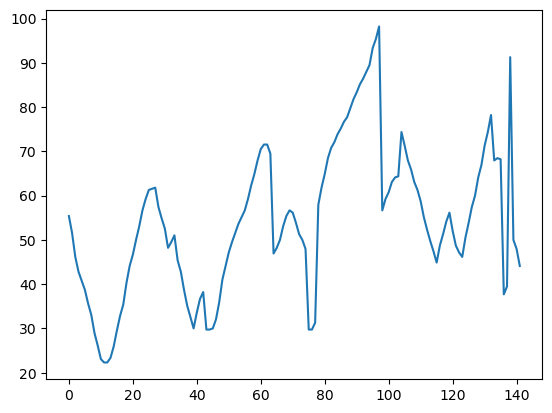

In [23]:
# line plot of first col of df1
first_col.plot(kind='line')

<Axes: xlabel='x', ylabel='y'>

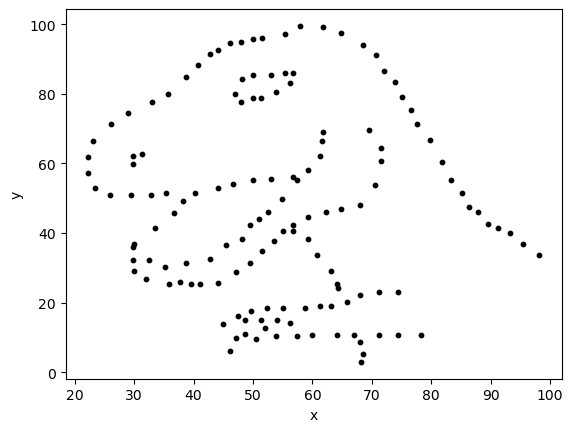

In [24]:
# Plotting scatter plot of first dataframe. Read dataframe.plot.scatter() function in pandas library to check arguments.
df1.plot.scatter(x='x', y='y', s=10, c='Black')

<Axes: xlabel='x', ylabel='y'>

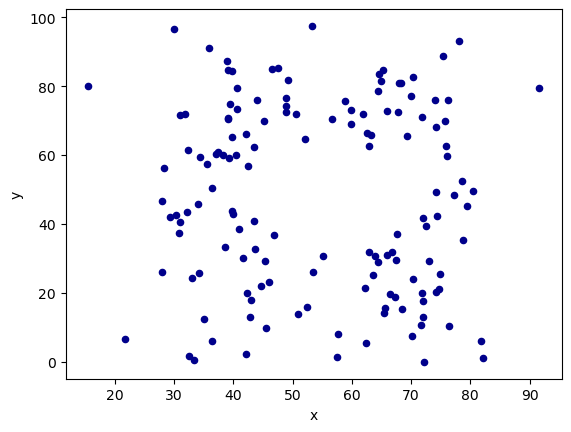

In [25]:
# Plotting scatter plot for second dataframe
df2.plot.scatter(x='x', y='y', c='DarkBlue')

<Axes: xlabel='x', ylabel='y'>

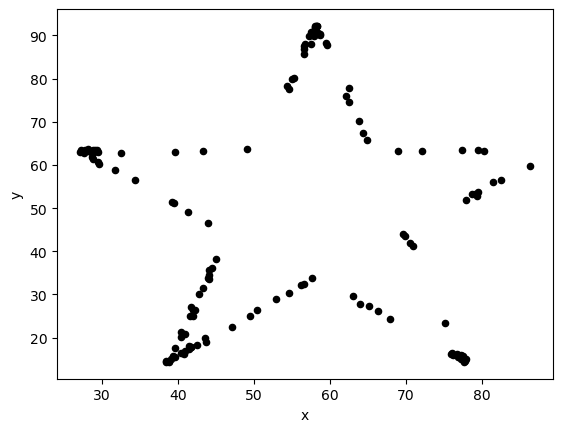

In [26]:
# Plotting scatter plot for third dataframe
df3.plot.scatter(x='x', y='y', c='Black')

## Checkpoint

Congratulations! you have finished the required task for Week 2. Since you got this empty (without your code and output) notebook by downloading from iLearn, place this notebook (Workshop Week 2.ipynb) into your local copy of your Github repository (e.g. practical-workshops-sonitsingh)and commit your work with a suitable commit message and push your changes back to your Github repository. Show your tutor your updated Github repository to get your checkpoint mark.

# Further Practice

If you finish this task you can practice more with pandas data frames by following the examples in the text, section 2.6.  The CSV file that they use in that section is available in the `files` directory of this repository as `educ_figdp_1_Data.csv`.   

In [ ]:
edufile = 'files/educ_figdp_1_Data.csv'